In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///F:/survey%20lung%20cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
le=LabelEncoder()

In [4]:
df['GENDER']=le.fit_transform(df['GENDER'])

In [5]:
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [6]:
df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0


In [7]:
df.shape

(309, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int32
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [9]:
df.dtypes

GENDER                   int32
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int32
dtype: object

In [11]:
df.value_counts

<bound method DataFrame.value_counts of      GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       0   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2        

In [12]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [13]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,309.0,0.524272,0.500221,0.0,0.0,1.0,1.0,1.0
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [15]:
df.mean()

GENDER                    0.524272
AGE                      62.673139
SMOKING                   1.563107
YELLOW_FINGERS            1.569579
ANXIETY                   1.498382
PEER_PRESSURE             1.501618
CHRONIC DISEASE           1.504854
FATIGUE                   1.673139
ALLERGY                   1.556634
WHEEZING                  1.556634
ALCOHOL CONSUMING         1.556634
COUGHING                  1.579288
SHORTNESS OF BREATH       1.640777
SWALLOWING DIFFICULTY     1.469256
CHEST PAIN                1.556634
LUNG_CANCER               0.873786
dtype: float64

In [16]:
df.min()

GENDER                    0
AGE                      21
SMOKING                   1
YELLOW_FINGERS            1
ANXIETY                   1
PEER_PRESSURE             1
CHRONIC DISEASE           1
FATIGUE                   1
ALLERGY                   1
WHEEZING                  1
ALCOHOL CONSUMING         1
COUGHING                  1
SHORTNESS OF BREATH       1
SWALLOWING DIFFICULTY     1
CHEST PAIN                1
LUNG_CANCER               0
dtype: int64

In [17]:
df.max()

GENDER                    1
AGE                      87
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               1
dtype: int64

In [18]:
df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0


In [19]:
x=df.drop(['GENDER'],axis='columns')

In [20]:
y=df.GENDER.values

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20)

In [22]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest , pred_tre)*100
accu_tre

84.94623655913979

In [24]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        38
           1       0.89      0.85      0.87        55

    accuracy                           0.85        93
   macro avg       0.84      0.85      0.85        93
weighted avg       0.85      0.85      0.85        93



In [26]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

69.89247311827957

In [27]:
print(classification_report(ytest,pred_lo))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        38
           1       0.76      0.71      0.74        55

    accuracy                           0.70        93
   macro avg       0.69      0.70      0.69        93
weighted avg       0.71      0.70      0.70        93



In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

68.81720430107528

In [31]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63        38
           1       0.75      0.71      0.73        55

    accuracy                           0.69        93
   macro avg       0.68      0.68      0.68        93
weighted avg       0.69      0.69      0.69        93



In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

64.51612903225806

In [36]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

           0       0.56      0.66      0.60        38
           1       0.73      0.64      0.68        55

    accuracy                           0.65        93
   macro avg       0.64      0.65      0.64        93
weighted avg       0.66      0.65      0.65        93



In [37]:
from sklearn.ensemble import BaggingClassifier

In [38]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest,pred_bag)*100
accu_bag

87.09677419354838

In [40]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85        38
           1       0.91      0.87      0.89        55

    accuracy                           0.87        93
   macro avg       0.87      0.87      0.87        93
weighted avg       0.87      0.87      0.87        93



In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

70.96774193548387

In [43]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        38
           1       0.78      0.71      0.74        55

    accuracy                           0.71        93
   macro avg       0.70      0.71      0.70        93
weighted avg       0.72      0.71      0.71        93



In [44]:
from sklearn.ensemble import ExtraTreesClassifier

In [45]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

90.32258064516128

In [46]:
print(classification_report(ytest,pre_etc))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        38
           1       0.96      0.87      0.91        55

    accuracy                           0.90        93
   macro avg       0.90      0.91      0.90        93
weighted avg       0.91      0.90      0.90        93



In [47]:
from sklearn.svm import SVC

In [48]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_siv=svc.predict(xtest)
accu_siv=accuracy_score(ytest,pre_siv)*100
accu_siv

40.86021505376344

In [49]:
print(classification_report(ytest,pre_siv))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        38
           1       0.00      0.00      0.00        55

    accuracy                           0.41        93
   macro avg       0.20      0.50      0.29        93
weighted avg       0.17      0.41      0.24        93



C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_rnd)*100
accu_rnd

88.17204301075269

In [52]:
print(classification_report(ytest,pre_rnd))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        38
           1       0.96      0.84      0.89        55

    accuracy                           0.88        93
   macro avg       0.88      0.89      0.88        93
weighted avg       0.89      0.88      0.88        93



In [53]:
from catboost import CatBoostRegressor

In [54]:
cat=CatBoostRegressor()
cat.fit(xtrain,ytrain)

Learning rate set to 0.029712
0:	learn: 0.4944707	total: 264ms	remaining: 4m 23s
1:	learn: 0.4912344	total: 265ms	remaining: 2m 12s
2:	learn: 0.4856125	total: 267ms	remaining: 1m 28s
3:	learn: 0.4798230	total: 271ms	remaining: 1m 7s
4:	learn: 0.4732930	total: 274ms	remaining: 54.5s
5:	learn: 0.4690787	total: 277ms	remaining: 45.9s
6:	learn: 0.4638606	total: 280ms	remaining: 39.7s
7:	learn: 0.4598536	total: 283ms	remaining: 35.1s
8:	learn: 0.4540337	total: 286ms	remaining: 31.5s
9:	learn: 0.4511996	total: 287ms	remaining: 28.4s
10:	learn: 0.4478119	total: 290ms	remaining: 26.1s
11:	learn: 0.4428410	total: 293ms	remaining: 24.1s
12:	learn: 0.4379024	total: 296ms	remaining: 22.5s
13:	learn: 0.4331264	total: 299ms	remaining: 21.1s
14:	learn: 0.4289583	total: 301ms	remaining: 19.7s
15:	learn: 0.4248304	total: 303ms	remaining: 18.7s
16:	learn: 0.4201911	total: 306ms	remaining: 17.7s
17:	learn: 0.4162396	total: 309ms	remaining: 16.9s
18:	learn: 0.4109024	total: 312ms	remaining: 16.1s
19:	lear

172:	learn: 0.1793749	total: 705ms	remaining: 3.37s
173:	learn: 0.1790562	total: 707ms	remaining: 3.36s
174:	learn: 0.1782711	total: 709ms	remaining: 3.34s
175:	learn: 0.1774932	total: 711ms	remaining: 3.33s
176:	learn: 0.1768032	total: 713ms	remaining: 3.32s
177:	learn: 0.1762275	total: 715ms	remaining: 3.3s
178:	learn: 0.1755046	total: 717ms	remaining: 3.29s
179:	learn: 0.1746972	total: 719ms	remaining: 3.27s
180:	learn: 0.1741123	total: 721ms	remaining: 3.26s
181:	learn: 0.1737496	total: 723ms	remaining: 3.25s
182:	learn: 0.1730546	total: 725ms	remaining: 3.24s
183:	learn: 0.1721633	total: 728ms	remaining: 3.23s
184:	learn: 0.1711747	total: 731ms	remaining: 3.22s
185:	learn: 0.1703768	total: 733ms	remaining: 3.21s
186:	learn: 0.1697845	total: 734ms	remaining: 3.19s
187:	learn: 0.1689566	total: 736ms	remaining: 3.18s
188:	learn: 0.1685847	total: 738ms	remaining: 3.17s
189:	learn: 0.1680485	total: 741ms	remaining: 3.16s
190:	learn: 0.1671475	total: 742ms	remaining: 3.14s
191:	learn: 0

333:	learn: 0.1171294	total: 1.01s	remaining: 2.01s
334:	learn: 0.1167706	total: 1.01s	remaining: 2s
335:	learn: 0.1165227	total: 1.01s	remaining: 2s
336:	learn: 0.1162517	total: 1.01s	remaining: 2s
337:	learn: 0.1160126	total: 1.01s	remaining: 1.99s
338:	learn: 0.1157828	total: 1.02s	remaining: 1.98s
339:	learn: 0.1155330	total: 1.02s	remaining: 1.98s
340:	learn: 0.1153165	total: 1.02s	remaining: 1.97s
341:	learn: 0.1151062	total: 1.02s	remaining: 1.97s
342:	learn: 0.1147693	total: 1.03s	remaining: 1.97s
343:	learn: 0.1144371	total: 1.03s	remaining: 1.97s
344:	learn: 0.1141095	total: 1.03s	remaining: 1.96s
345:	learn: 0.1139940	total: 1.03s	remaining: 1.96s
346:	learn: 0.1137443	total: 1.04s	remaining: 1.95s
347:	learn: 0.1134231	total: 1.04s	remaining: 1.95s
348:	learn: 0.1130763	total: 1.04s	remaining: 1.94s
349:	learn: 0.1128947	total: 1.04s	remaining: 1.94s
350:	learn: 0.1127526	total: 1.05s	remaining: 1.93s
351:	learn: 0.1124782	total: 1.05s	remaining: 1.93s
352:	learn: 0.1122210

525:	learn: 0.0828905	total: 1.47s	remaining: 1.32s
526:	learn: 0.0827595	total: 1.47s	remaining: 1.32s
527:	learn: 0.0827493	total: 1.48s	remaining: 1.32s
528:	learn: 0.0827305	total: 1.48s	remaining: 1.32s
529:	learn: 0.0826277	total: 1.48s	remaining: 1.31s
530:	learn: 0.0824624	total: 1.48s	remaining: 1.31s
531:	learn: 0.0823185	total: 1.49s	remaining: 1.31s
532:	learn: 0.0822462	total: 1.49s	remaining: 1.3s
533:	learn: 0.0821653	total: 1.49s	remaining: 1.3s
534:	learn: 0.0820652	total: 1.5s	remaining: 1.3s
535:	learn: 0.0819318	total: 1.5s	remaining: 1.3s
536:	learn: 0.0819280	total: 1.5s	remaining: 1.29s
537:	learn: 0.0818606	total: 1.5s	remaining: 1.29s
538:	learn: 0.0818088	total: 1.51s	remaining: 1.29s
539:	learn: 0.0816968	total: 1.51s	remaining: 1.28s
540:	learn: 0.0816843	total: 1.51s	remaining: 1.28s
541:	learn: 0.0816366	total: 1.51s	remaining: 1.28s
542:	learn: 0.0815293	total: 1.52s	remaining: 1.28s
543:	learn: 0.0813612	total: 1.52s	remaining: 1.27s
544:	learn: 0.081339

684:	learn: 0.0712541	total: 1.77s	remaining: 814ms
685:	learn: 0.0711865	total: 1.77s	remaining: 811ms
686:	learn: 0.0711197	total: 1.78s	remaining: 809ms
687:	learn: 0.0710191	total: 1.78s	remaining: 806ms
688:	learn: 0.0709848	total: 1.78s	remaining: 803ms
689:	learn: 0.0709835	total: 1.78s	remaining: 800ms
690:	learn: 0.0709790	total: 1.78s	remaining: 797ms
691:	learn: 0.0708349	total: 1.78s	remaining: 794ms
692:	learn: 0.0707700	total: 1.79s	remaining: 792ms
693:	learn: 0.0706423	total: 1.79s	remaining: 789ms
694:	learn: 0.0705104	total: 1.79s	remaining: 786ms
695:	learn: 0.0704019	total: 1.79s	remaining: 783ms
696:	learn: 0.0704004	total: 1.79s	remaining: 780ms
697:	learn: 0.0702817	total: 1.8s	remaining: 777ms
698:	learn: 0.0701824	total: 1.8s	remaining: 775ms
699:	learn: 0.0700686	total: 1.8s	remaining: 772ms
700:	learn: 0.0699447	total: 1.8s	remaining: 769ms
701:	learn: 0.0698278	total: 1.8s	remaining: 766ms
702:	learn: 0.0698180	total: 1.8s	remaining: 763ms
703:	learn: 0.0697

862:	learn: 0.0617980	total: 2.08s	remaining: 330ms
863:	learn: 0.0617972	total: 2.08s	remaining: 327ms
864:	learn: 0.0617479	total: 2.08s	remaining: 325ms
865:	learn: 0.0617446	total: 2.08s	remaining: 322ms
866:	learn: 0.0616837	total: 2.08s	remaining: 320ms
867:	learn: 0.0616381	total: 2.09s	remaining: 317ms
868:	learn: 0.0615805	total: 2.09s	remaining: 315ms
869:	learn: 0.0615444	total: 2.09s	remaining: 312ms
870:	learn: 0.0614936	total: 2.09s	remaining: 310ms
871:	learn: 0.0614931	total: 2.09s	remaining: 307ms
872:	learn: 0.0614922	total: 2.09s	remaining: 305ms
873:	learn: 0.0614917	total: 2.1s	remaining: 302ms
874:	learn: 0.0614353	total: 2.1s	remaining: 300ms
875:	learn: 0.0614322	total: 2.1s	remaining: 298ms
876:	learn: 0.0613882	total: 2.1s	remaining: 295ms
877:	learn: 0.0613299	total: 2.1s	remaining: 293ms
878:	learn: 0.0613291	total: 2.11s	remaining: 290ms
879:	learn: 0.0612925	total: 2.11s	remaining: 288ms
880:	learn: 0.0612647	total: 2.11s	remaining: 285ms
881:	learn: 0.061

In [56]:
cat.score(xtest,ytest)*100

57.386011169856

In [57]:
from catboost import CatBoostClassifier

In [58]:
cat2=CatBoostRegressor()
cat2.fit(xtrain,ytrain)

Learning rate set to 0.029712
0:	learn: 0.4944707	total: 2.54ms	remaining: 2.54s
1:	learn: 0.4912344	total: 3.31ms	remaining: 1.65s
2:	learn: 0.4856125	total: 7.96ms	remaining: 2.65s
3:	learn: 0.4798230	total: 15.2ms	remaining: 3.77s
4:	learn: 0.4732930	total: 21.9ms	remaining: 4.36s
5:	learn: 0.4690787	total: 25.8ms	remaining: 4.27s
6:	learn: 0.4638606	total: 28.5ms	remaining: 4.05s
7:	learn: 0.4598536	total: 31.4ms	remaining: 3.9s
8:	learn: 0.4540337	total: 33.8ms	remaining: 3.72s
9:	learn: 0.4511996	total: 35ms	remaining: 3.46s
10:	learn: 0.4478119	total: 37.2ms	remaining: 3.35s
11:	learn: 0.4428410	total: 39.5ms	remaining: 3.25s
12:	learn: 0.4379024	total: 41.3ms	remaining: 3.13s
13:	learn: 0.4331264	total: 43.2ms	remaining: 3.04s
14:	learn: 0.4289583	total: 44.3ms	remaining: 2.91s
15:	learn: 0.4248304	total: 46.1ms	remaining: 2.84s
16:	learn: 0.4201911	total: 48.3ms	remaining: 2.79s
17:	learn: 0.4162396	total: 50.6ms	remaining: 2.76s
18:	learn: 0.4109024	total: 52.5ms	remaining: 2

223:	learn: 0.1518934	total: 463ms	remaining: 1.6s
224:	learn: 0.1513893	total: 465ms	remaining: 1.6s
225:	learn: 0.1509325	total: 467ms	remaining: 1.6s
226:	learn: 0.1504090	total: 469ms	remaining: 1.6s
227:	learn: 0.1497313	total: 475ms	remaining: 1.61s
228:	learn: 0.1492395	total: 478ms	remaining: 1.61s
229:	learn: 0.1488211	total: 480ms	remaining: 1.61s
230:	learn: 0.1482459	total: 482ms	remaining: 1.6s
231:	learn: 0.1479313	total: 484ms	remaining: 1.6s
232:	learn: 0.1474285	total: 486ms	remaining: 1.6s
233:	learn: 0.1471358	total: 488ms	remaining: 1.6s
234:	learn: 0.1464374	total: 491ms	remaining: 1.6s
235:	learn: 0.1460621	total: 494ms	remaining: 1.6s
236:	learn: 0.1453928	total: 497ms	remaining: 1.6s
237:	learn: 0.1449241	total: 500ms	remaining: 1.6s
238:	learn: 0.1444865	total: 502ms	remaining: 1.6s
239:	learn: 0.1441024	total: 504ms	remaining: 1.59s
240:	learn: 0.1436118	total: 506ms	remaining: 1.59s
241:	learn: 0.1432290	total: 508ms	remaining: 1.59s
242:	learn: 0.1428245	tot

447:	learn: 0.0937107	total: 907ms	remaining: 1.12s
448:	learn: 0.0935310	total: 909ms	remaining: 1.11s
449:	learn: 0.0932885	total: 911ms	remaining: 1.11s
450:	learn: 0.0930611	total: 913ms	remaining: 1.11s
451:	learn: 0.0928973	total: 915ms	remaining: 1.11s
452:	learn: 0.0927066	total: 917ms	remaining: 1.11s
453:	learn: 0.0923698	total: 918ms	remaining: 1.1s
454:	learn: 0.0922257	total: 920ms	remaining: 1.1s
455:	learn: 0.0921406	total: 922ms	remaining: 1.1s
456:	learn: 0.0918680	total: 924ms	remaining: 1.1s
457:	learn: 0.0917348	total: 926ms	remaining: 1.09s
458:	learn: 0.0915417	total: 928ms	remaining: 1.09s
459:	learn: 0.0913587	total: 929ms	remaining: 1.09s
460:	learn: 0.0912401	total: 931ms	remaining: 1.09s
461:	learn: 0.0910772	total: 933ms	remaining: 1.09s
462:	learn: 0.0909398	total: 935ms	remaining: 1.08s
463:	learn: 0.0906833	total: 937ms	remaining: 1.08s
464:	learn: 0.0904470	total: 940ms	remaining: 1.08s
465:	learn: 0.0902469	total: 943ms	remaining: 1.08s
466:	learn: 0.09

649:	learn: 0.0732830	total: 1.36s	remaining: 735ms
650:	learn: 0.0731620	total: 1.37s	remaining: 733ms
651:	learn: 0.0730419	total: 1.37s	remaining: 731ms
652:	learn: 0.0729116	total: 1.37s	remaining: 729ms
653:	learn: 0.0729096	total: 1.38s	remaining: 728ms
654:	learn: 0.0729074	total: 1.38s	remaining: 726ms
655:	learn: 0.0728662	total: 1.38s	remaining: 724ms
656:	learn: 0.0728644	total: 1.38s	remaining: 722ms
657:	learn: 0.0727633	total: 1.39s	remaining: 721ms
658:	learn: 0.0726244	total: 1.39s	remaining: 719ms
659:	learn: 0.0725547	total: 1.39s	remaining: 717ms
660:	learn: 0.0725530	total: 1.39s	remaining: 715ms
661:	learn: 0.0724339	total: 1.4s	remaining: 713ms
662:	learn: 0.0723701	total: 1.4s	remaining: 712ms
663:	learn: 0.0723683	total: 1.4s	remaining: 710ms
664:	learn: 0.0723667	total: 1.4s	remaining: 708ms
665:	learn: 0.0723645	total: 1.41s	remaining: 705ms
666:	learn: 0.0723601	total: 1.41s	remaining: 703ms
667:	learn: 0.0722866	total: 1.41s	remaining: 701ms
668:	learn: 0.07

809:	learn: 0.0640648	total: 1.67s	remaining: 391ms
810:	learn: 0.0639902	total: 1.67s	remaining: 389ms
811:	learn: 0.0639447	total: 1.67s	remaining: 387ms
812:	learn: 0.0638581	total: 1.67s	remaining: 385ms
813:	learn: 0.0638012	total: 1.68s	remaining: 383ms
814:	learn: 0.0637113	total: 1.68s	remaining: 381ms
815:	learn: 0.0636654	total: 1.68s	remaining: 379ms
816:	learn: 0.0636230	total: 1.68s	remaining: 377ms
817:	learn: 0.0636221	total: 1.68s	remaining: 375ms
818:	learn: 0.0635790	total: 1.69s	remaining: 372ms
819:	learn: 0.0635150	total: 1.69s	remaining: 370ms
820:	learn: 0.0634368	total: 1.69s	remaining: 368ms
821:	learn: 0.0633749	total: 1.69s	remaining: 366ms
822:	learn: 0.0633130	total: 1.69s	remaining: 364ms
823:	learn: 0.0633123	total: 1.7s	remaining: 362ms
824:	learn: 0.0632378	total: 1.7s	remaining: 360ms
825:	learn: 0.0631638	total: 1.7s	remaining: 358ms
826:	learn: 0.0630920	total: 1.7s	remaining: 356ms
827:	learn: 0.0630220	total: 1.7s	remaining: 354ms
828:	learn: 0.062

979:	learn: 0.0580235	total: 1.97s	remaining: 40.2ms
980:	learn: 0.0580055	total: 1.97s	remaining: 38.2ms
981:	learn: 0.0579615	total: 1.98s	remaining: 36.2ms
982:	learn: 0.0579608	total: 1.98s	remaining: 34.2ms
983:	learn: 0.0579413	total: 1.98s	remaining: 32.2ms
984:	learn: 0.0579239	total: 1.98s	remaining: 30.2ms
985:	learn: 0.0579150	total: 1.98s	remaining: 28.1ms
986:	learn: 0.0578980	total: 1.98s	remaining: 26.1ms
987:	learn: 0.0578781	total: 1.99s	remaining: 24.1ms
988:	learn: 0.0578231	total: 1.99s	remaining: 22.1ms
989:	learn: 0.0577479	total: 1.99s	remaining: 20.1ms
990:	learn: 0.0577125	total: 1.99s	remaining: 18.1ms
991:	learn: 0.0576920	total: 1.99s	remaining: 16.1ms
992:	learn: 0.0576392	total: 2s	remaining: 14.1ms
993:	learn: 0.0576003	total: 2s	remaining: 12.1ms
994:	learn: 0.0575566	total: 2s	remaining: 10ms
995:	learn: 0.0575278	total: 2s	remaining: 8.04ms
996:	learn: 0.0574887	total: 2s	remaining: 6.03ms
997:	learn: 0.0574561	total: 2.01s	remaining: 4.02ms
998:	learn

In [59]:
cat2.score(xtest,ytest)*100

57.386011169856

In [60]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','LogisticRegression','RandomForestClassifier',  'KNeighborsClassifier',
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','GradientBoostingClassifier','ExtraTreesClassifier','SVC'],
    'Score': [ accu_tre,accu_lo,accu_l, accu_kne, accu_ada,accu_bag,accu_l,accu_l,accu_etc,accu_siv,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
8,GradientBoostingClassifier,90.322581
10,SVC,88.172043
5,BaggingClassifier,87.096774
0,DecisionTreeClassifier,84.946237
2,RandomForestClassifier,70.967742
6,GaussianNB,70.967742
7,AdaBoostClassifier,70.967742
1,LogisticRegression,69.892473
3,KNeighborsClassifier,68.817204
4,AdaBoostClassifier,64.516129


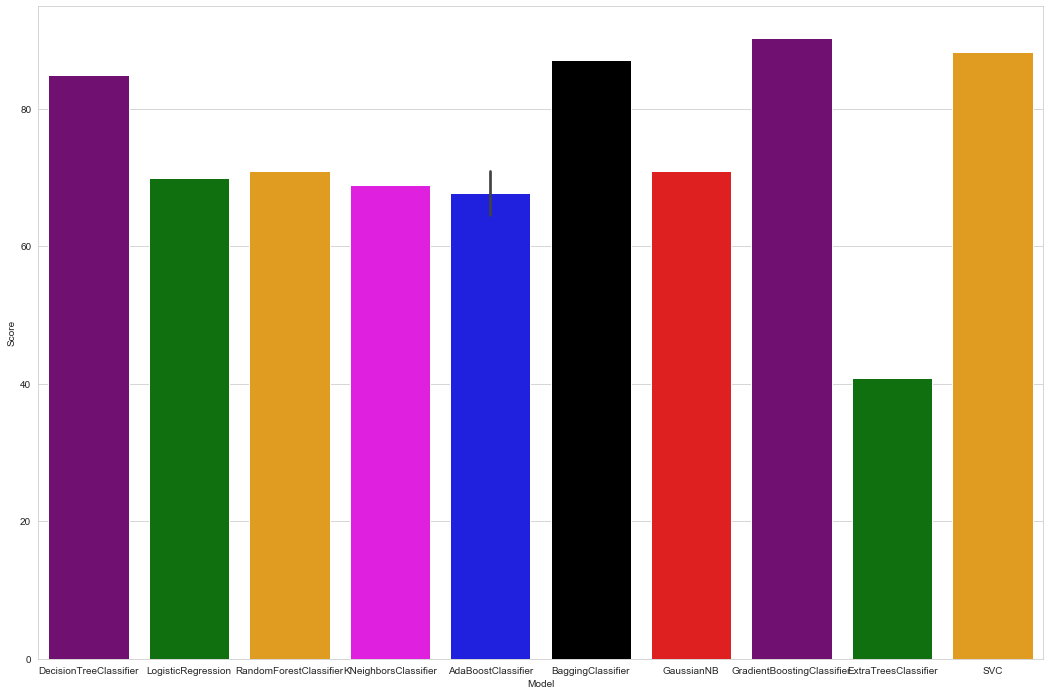

In [61]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(18,12))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [62]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [63]:
import sklearn.cluster as cluster

In [64]:
kmns=cluster.KMeans(n_clusters=5)

In [65]:
kmns.fit(df[['GENDER','SMOKING']])

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  """Entry point for launching an IPython kernel.


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
kmns.cluster_centers_

array([[ 3.33066907e-16,  2.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  2.00000000e+00],
       [-2.22044605e-16,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00]])

In [68]:
df['GENDER by SMOKING']=kmns.labels_

In [69]:
from sklearn.cluster import KMeans 

In [70]:
k_range=range(1,15)
wss=[]

In [71]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['GENDER','SMOKING']])
    wss.append(km.inertia_)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (4) found smaller than n

In [72]:
wss

[153.0873786407767,
 75.9193751574704,
 33.748148148148154,
 5.067815018462797e-29,
 3.726751479587077e-29,
 2.4448525086029327e-29,
 2.4448525086029327e-29,
 2.4448525086029327e-29,
 2.4448525086029327e-29,
 2.4448525086029327e-29,
 2.4448525086029327e-29,
 2.4448525086029327e-29,
 2.4448525086029327e-29,
 2.4448525086029327e-29]

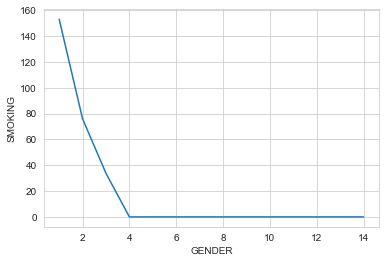

In [73]:
plt.xlabel('GENDER')
plt.ylabel('SMOKING')
plt.plot(k_range,wss)

In [74]:
kmns=cluster.KMeans(n_clusters=5)

In [75]:
kmns.fit(df[['GENDER','AGE']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [76]:
kmns.cluster_centers_

array([[ 0.55670103, 62.30927835],
       [ 0.44117647, 76.23529412],
       [ 0.43478261, 46.56521739],
       [ 0.5060241 , 56.30120482],
       [ 0.56944444, 69.25      ]])

In [77]:
df['GENDER by AGE']=kmns.labels_

In [78]:
k_range=range(1,15)
wss=[]

In [80]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['GENDER','AGE']])
    wss.append(km.inertia_)

In [81]:
wss

[20839.055016181228,
 8222.92500451508,
 4482.682438192669,
 3045.859960835537,
 2046.1855472013367,
 1413.0056095668942,
 1079.7158885776532,
 877.1096256684492,
 710.0182257707454,
 575.3907884919569,
 485.22348336206335,
 407.6777816720986,
 331.2871329488412,
 299.21338370353715]

In [83]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['GENDER','YELLOW_FINGERS']])
kmns.cluster_centers_

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  


array([[-3.33066907e-16,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00],
       [ 7.77156117e-16,  2.00000000e+00],
       [ 1.00000000e+00,  2.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00]])

In [84]:
df['GENDER by YELLOW_FINGERS']=kmns.labels_

In [85]:
k_range=range(1,15)
wss=[]

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['GENDER','YELLOW_FINGERS']])
    wss.append(km.inertia_)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to d

In [86]:
wss

[152.82200647249192,
 72.31846812799193,
 30.390977443609025,
 1.1470530599979275e-28,
 9.350466917197806e-29,
 9.350466917197806e-29,
 9.350466917197806e-29,
 9.350466917197806e-29,
 9.350466917197806e-29,
 9.350466917197806e-29,
 9.350466917197806e-29,
 9.350466917197806e-29,
 9.350466917197806e-29,
 9.350466917197806e-29]

In [87]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['GENDER','COUGHING']])
kmns.cluster_centers_

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  


array([[1.00000000e+00, 2.00000000e+00],
       [1.11022302e-16, 2.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00]])

In [88]:
df['GENDER by COUGHING']=kmns.labels_

In [90]:
k_range=range(1,15)
wss=[]

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['GENDER','COUGHING']])
    wss.append(km.inertia_)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to d

In [91]:
wss

[152.37540453074433,
 73.9692617787856,
 32.12307692307693,
 3.8121395096014294e-28,
 3.240215353316196e-28,
 2.7109698045985834e-28,
 8.874685183736383e-29,
 8.874685183736383e-29,
 8.874685183736383e-29,
 8.874685183736383e-29,
 8.874685183736383e-29,
 8.874685183736383e-29,
 8.874685183736383e-29,
 8.874685183736383e-29]

In [92]:
kmns=cluster.KMeans(n_clusters=5)

In [94]:
kmns=kmns.fit(df[['GENDER','LUNG_CANCER']])

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  """Entry point for launching an IPython kernel.


In [95]:
kmns.cluster_centers_

array([[ 1.00000000e+00,  1.00000000e+00],
       [ 1.22124533e-15,  1.00000000e+00],
       [-1.11022302e-16,  1.11022302e-16],
       [ 1.00000000e+00, -1.11022302e-16],
       [ 1.00000000e+00,  1.00000000e+00]])

In [96]:
df['GENDER by LUNG_CANCER']=kmns.labels_

In [97]:
from sklearn.cluster import KMeans 

In [98]:
k_range=range(1,15)
wss=[]

In [99]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['GENDER','LUNG_CANCER']])
    wss.append(km.inertia_)
    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (4) found smaller than n

In [100]:
wss

[111.14563106796115,
 33.923532375913325,
 9.589743589743591,
 4.512939194045279e-28,
 4.512939194045279e-28,
 1.2233507006747722e-30,
 1.2233507006747722e-30,
 1.2233507006747722e-30,
 1.2233507006747722e-30,
 1.2233507006747722e-30,
 1.2233507006747722e-30,
 1.2233507006747722e-30,
 1.2233507006747722e-30,
 1.2233507006747722e-30]

In [101]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,...,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER by SMOKING,GENDER by AGE,GENDER by YELLOW_FINGERS,GENDER by COUGHING,GENDER by LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,...,2,2,2,2,1,1,4,3,0,0
1,1,74,2,1,1,1,2,2,2,1,...,1,2,2,2,1,2,1,1,3,0
2,0,59,1,1,1,2,1,2,1,2,...,2,2,1,2,0,3,3,0,1,2
3,1,63,2,2,2,1,1,1,1,1,...,1,1,2,2,0,2,0,3,3,3
4,0,63,1,2,1,1,1,1,1,2,...,2,2,1,1,0,3,0,2,1,2


In [102]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER',
       'GENDER by SMOKING', 'GENDER by AGE', 'GENDER by YELLOW_FINGERS',
       'GENDER by COUGHING', 'GENDER by LUNG_CANCER'],
      dtype='object')

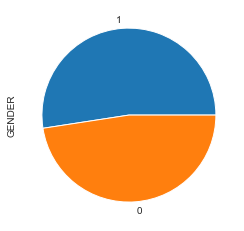

In [103]:
df.GENDER.value_counts().plot(kind='pie')

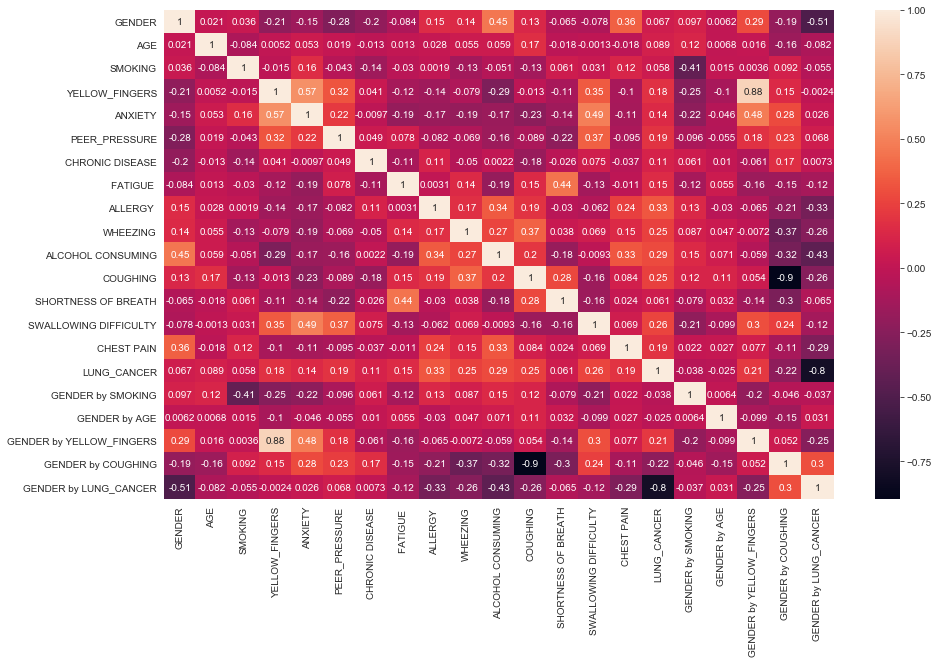

In [105]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

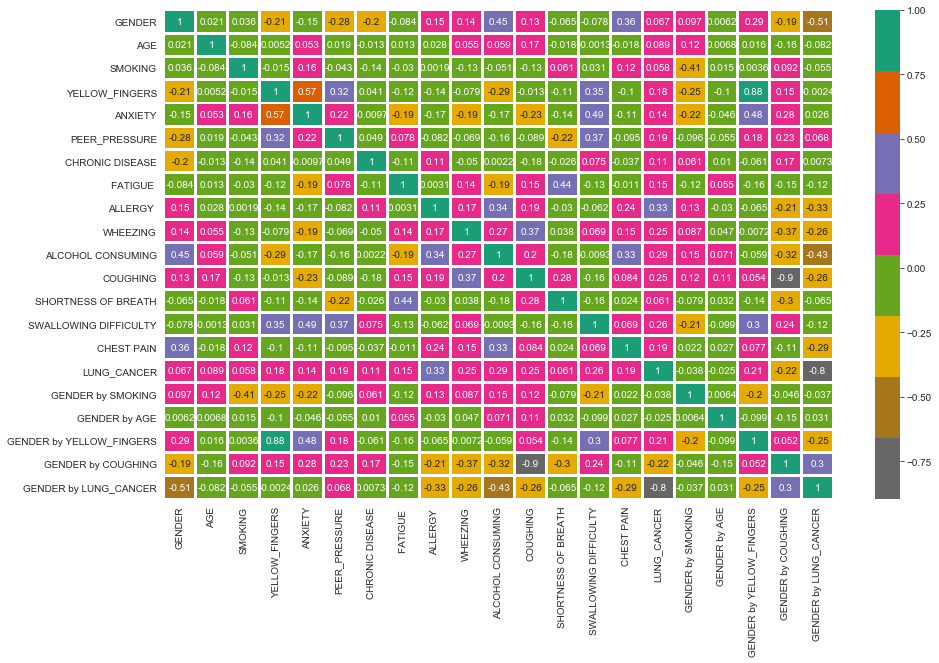

In [106]:
plt.figure(figsize=(15,9))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

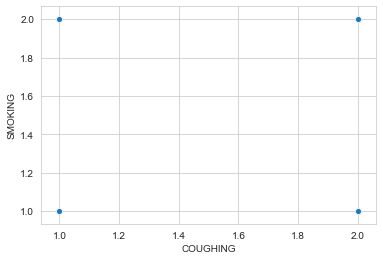

In [109]:
sns.scatterplot(x='COUGHING',y='SMOKING',data=df)

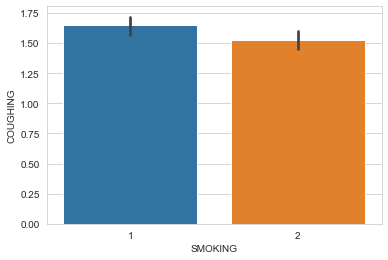

In [119]:
sns.barplot(x='SMOKING',y='COUGHING',data=df)

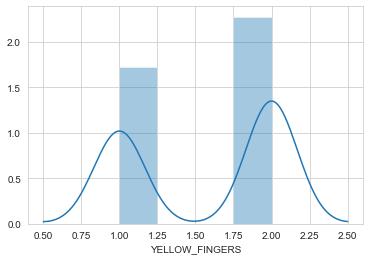

In [121]:
sns.distplot(df['YELLOW_FINGERS'])

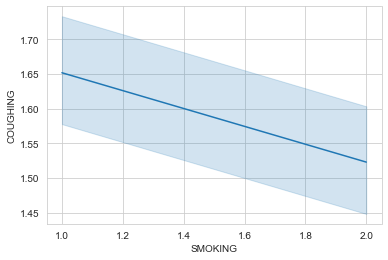

In [123]:
sns.lineplot(x='SMOKING',y='COUGHING',data=df)

In [124]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER',
       'GENDER by SMOKING', 'GENDER by AGE', 'GENDER by YELLOW_FINGERS',
       'GENDER by COUGHING', 'GENDER by LUNG_CANCER'],
      dtype='object')

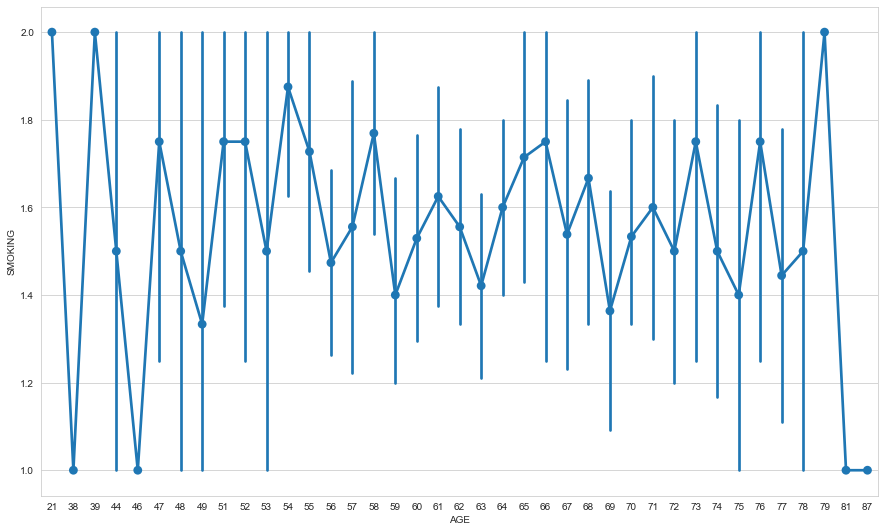

In [126]:
plt.figure(figsize=(15,9))
sns.pointplot(x='AGE',y='SMOKING',data=df)

<Figure size 1080x648 with 0 Axes>

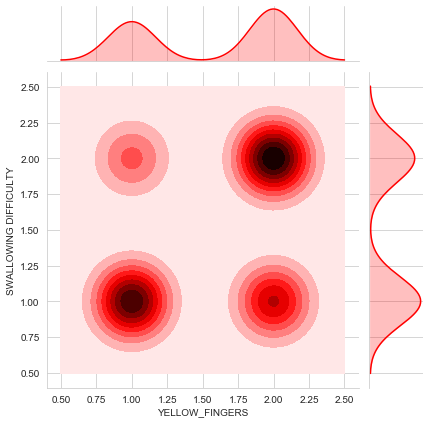

In [127]:
plt.figure(figsize=(15,9))
sns.jointplot(x='YELLOW_FINGERS',y='SWALLOWING DIFFICULTY',data=df,kind='kde',color='red')

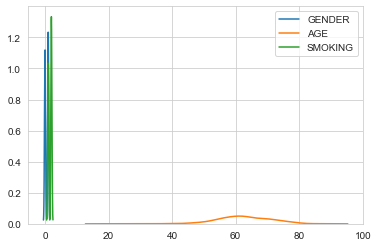

In [128]:
sns.kdeplot(df['GENDER'])
sns.kdeplot(df['AGE'])
sns.kdeplot(df['SMOKING'])

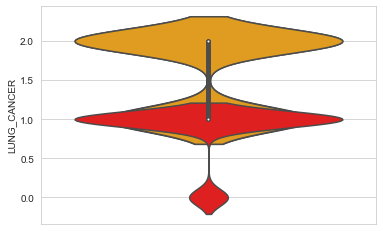

In [129]:
sns.violinplot(y="SMOKING",data=df)
sns.violinplot(y="YELLOW_FINGERS",data=df,color='orange')
sns.violinplot(y="LUNG_CANCER",data=df,color='red')

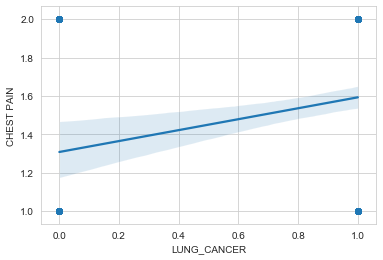

In [130]:
sns.regplot(x=df["LUNG_CANCER"], y=df["CHEST PAIN"], 
data=df)

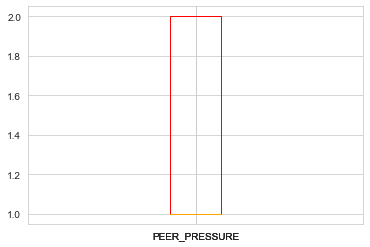

In [131]:
df.boxplot(column="YELLOW_FINGERS")
df.boxplot(column="ANXIETY",color='orange')
df.boxplot(column="PEER_PRESSURE",color='red')

In [132]:
import sweetviz as sv

In [133]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [134]:
from IPython.display import IFrame

In [135]:
IFrame(src='Analyze.html',width=1000,height=600)

In [136]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER',
       'GENDER by SMOKING', 'GENDER by AGE', 'GENDER by YELLOW_FINGERS',
       'GENDER by COUGHING', 'GENDER by LUNG_CANCER'],
      dtype='object')

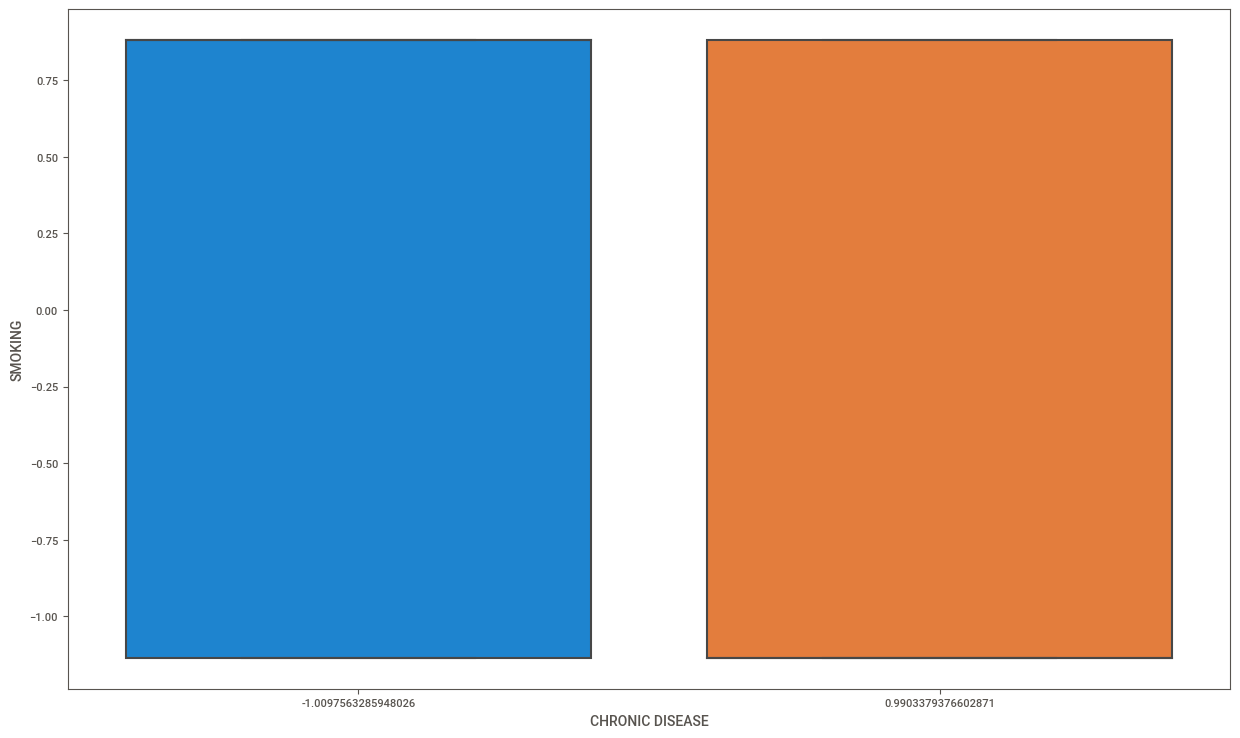

In [141]:
plt.figure(figsize=(15,9))
sns.boxplot(x='CHRONIC DISEASE',y='SMOKING',data=df)

In [ ]:
plt.figure(figsize=(15,9))
sns.boxenplot(x='ALCOHOL CONSUMING',y='AGE',data=df)

In [137]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [138]:
man=MinMaxScaler()
feat=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']
df[feat]=man.fit_transform(df[feat])
df[feat]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1.0,0.727273,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.803030,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.575758,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.636364,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.636364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.0,0.530303,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
305,1.0,0.742424,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
306,1.0,0.560606,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
307,1.0,0.696970,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [139]:
man=StandardScaler()
feat=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']
df[feat]=man.fit_transform(df[feat])
df[feat]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.952579,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475,0.380058
1,0.952579,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475,0.380058
2,-1.049781,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475,-2.631174
3,0.952579,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475,-2.631174
4,-1.049781,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480,-2.631174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,-1.049781,-0.814095,-1.135292,-1.150351,-0.996769,0.996769,0.990338,0.696833,-1.120480,-1.120480,0.892475,0.852207,0.748736,1.063501,-1.120480,0.380058
305,0.952579,0.893846,0.880830,-1.150351,-0.996769,-1.003241,-1.009756,0.696833,0.892475,0.892475,0.892475,0.852207,0.748736,-0.940291,0.892475,0.380058
306,0.952579,-0.570103,0.880830,-1.150351,-0.996769,-1.003241,-1.009756,-1.435063,0.892475,0.892475,0.892475,0.852207,-1.335584,-0.940291,0.892475,0.380058
307,0.952579,0.527859,0.880830,-1.150351,1.003241,-1.003241,-1.009756,0.696833,0.892475,-1.120480,0.892475,0.852207,0.748736,-0.940291,0.892475,0.380058
